In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

torch.__version__

'1.4.0'

### Load data:

In [2]:
df = pd.read_csv("transistors.csv", header=None)
df.head(4)

,0,1
0,Year,Transistors
1,1971.875,2.30824152676
2,1972.30769231,3.55452235561
3,1974.32692308,6.09756235221


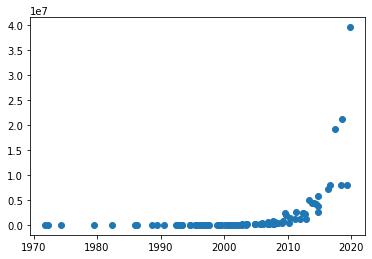

In [3]:
x = df[0].values[1:].astype("float32").reshape(-1, 1)
y = df[1].values[1:].astype("float32").reshape(-1, 1)
plt.scatter(x, y);

### Better suited for Regression model:

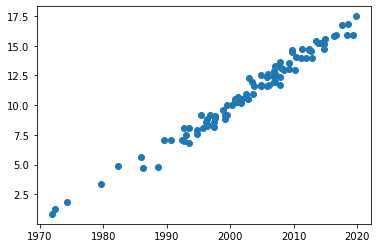

In [4]:
y = np.log(y)
plt.scatter(x, y);

### Normalize data:

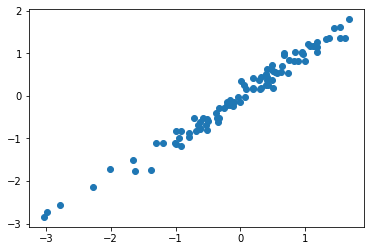

In [5]:
mx = x.mean()
sx = x.std()
my = y.mean()
sy = y.std()

x = (x - mx) / sx
y = (y - my) / sy
plt.scatter(x, y);

**Note:** Suited around 0.

### Make tensors:

In [6]:
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)

### Regression model:

In [7]:
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

### Train model:

In [9]:
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    if epoch % 5 == 0:
        print(f"Epoch {epoch + 1}/{epochs} Loss: {loss}")

Epoch 1/100 Loss: 0.5112932324409485
Epoch 6/100 Loss: 0.3398951292037964
Epoch 11/100 Loss: 0.17583775520324707
Epoch 16/100 Loss: 0.08980552852153778
Epoch 21/100 Loss: 0.05114136263728142
Epoch 26/100 Loss: 0.034690700471401215
Epoch 31/100 Loss: 0.02783840522170067
Epoch 36/100 Loss: 0.025008350610733032
Epoch 41/100 Loss: 0.023843560367822647
Epoch 46/100 Loss: 0.023364825174212456
Epoch 51/100 Loss: 0.023168180137872696
Epoch 56/100 Loss: 0.02308741956949234
Epoch 61/100 Loss: 0.02305426076054573
Epoch 66/100 Loss: 0.023040639236569405
Epoch 71/100 Loss: 0.023035049438476562
Epoch 76/100 Loss: 0.02303275652229786
Epoch 81/100 Loss: 0.023031815886497498
Epoch 86/100 Loss: 0.02303142286837101
Epoch 91/100 Loss: 0.023031264543533325
Epoch 96/100 Loss: 0.023031199350953102


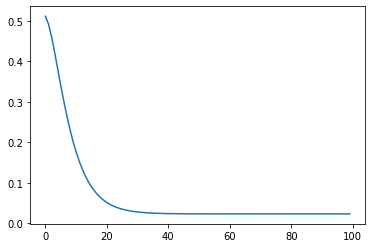

In [10]:
plt.plot(losses);

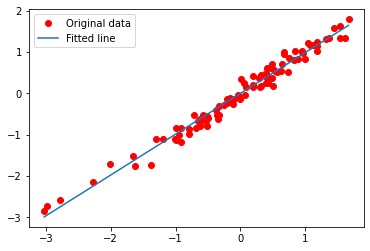

In [15]:
predicted = model(torch.from_numpy(x)).detach().numpy()
plt.plot(x, y, 'ro', label="Original data")
plt.plot(x, predicted, label="Fitted line")
plt.legend();
plt.savefig("figure.png")

In [26]:
w = model.weight.detach().numpy()[0][0]
a = w * sy /sx

print("Time to double:", np.log(2) / a)

Time to double: 1.994617360451962
